In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly_express as px 
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import requests
from PIL import Image
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
lego_sets = pd.read_csv('data/lego_sets.csv')
lego_sets.head()

# Drop relevant missing rows
lego_sets_clean = lego_sets.dropna(subset=['set_num', 'name', 'theme_name'])
lego_sets_clean

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [3]:
# Get list of licensed sets
parent_themes = pd.read_csv('data/parent_themes.csv')
parent_themes.rename(columns={'name': 'parent_theme'}, inplace=True)

parent_themes


,id,parent_theme,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
...,...,...,...
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True


In [4]:
lego_merge = pd.merge(lego_sets_clean, parent_themes[['parent_theme', 'is_licensed']], on='parent_theme', how='left')
lego_merge

,set_num,name,year,num_parts,theme_name,parent_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,False
...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,False


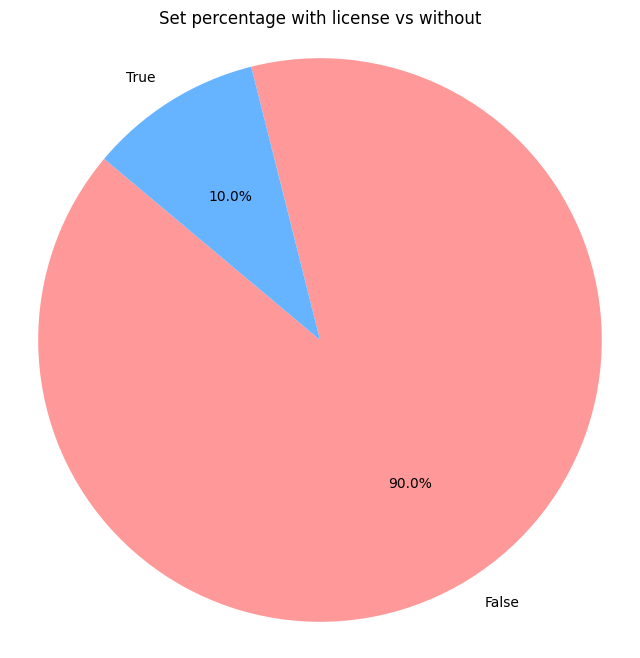

In [5]:
licensed = lego_merge['is_licensed'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(licensed, labels=licensed.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Set percentage with license vs without')
plt.axis('equal')
plt.show()

In [6]:
parent_theme_counts = lego_merge['parent_theme'].value_counts().reset_index()
parent_theme_counts.columns = ['parent_theme', 'count']

fig = px.bar(parent_theme_counts, x='parent_theme', y='count', 
             title= 'Sets quantity per parent theme', 
             labels={'parent_theme': 'Parent theme', 'count': 'Sets quantity'},
             hover_data={'count': True})
fig.show()

In [7]:
top_10 = lego_merge.nlargest(10, 'num_parts')

fig = px.bar(top_10, x='name', y='num_parts',
             hover_data=['theme_name', 'parent_theme'],
             labels={'name': 'Set name', 'num_parts': 'Nº of parts'},
             title='Top 10 sets with more parts')
fig.show()

In [8]:
themes_of_interest = ['Star Wars', 'Jurassic Park', 'Harry Potter', 'Super Heroes']
filtered_sets = lego_merge[lego_merge['theme_name'].isin(themes_of_interest)]

total_sets = len(lego_merge)
filtered_sets_count = len(filtered_sets)
percentage = (filtered_sets_count / total_sets) * 100

plot = {
    'Category': ['Selected_themes', 'Other'],
    'Count': [filtered_sets_count, total_sets - filtered_sets_count]
}

df_plot = pd.DataFrame(plot)
fig = px.pie(df_plot, values='Count', names='Category', title="% of total sets for selected themes")
fig.show()

In [9]:
licesed_sets = lego_merge[lego_merge['is_licensed'] == True]
set_per_parent = licesed_sets.groupby('parent_theme').size().reset_index(name='set_count')
fig = px.treemap(set_per_parent,  path=['parent_theme'], values='set_count', title='% of licensed sets')
fig.show()

In [10]:
licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == True].groupby('year').size().reset_index(name='set_count')

fig = px.line(licensed_sets_per_year, x='year', y='set_count', title='Number of Licensed Sets Released per Year',
              labels={'year': 'Year', 'set_count': 'Number of Licensed Sets'})
fig.show()

In [11]:
# Filter sets that are licensed
licensed_sets = lego_merge[lego_merge['is_licensed'] == True]

# Group the data by year and count the number of licensed sets released in each year
licensed_sets_per_year = licensed_sets.groupby(['year', 'parent_theme']).size().reset_index(name='set_count')

custom_colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.Set1

# Create the scatter plot
fig = px.scatter(licensed_sets_per_year, x='year', y='set_count', color='parent_theme',
                 title='Number of Licensed Sets Released per Year',
                 labels={'year': 'Year', 'set_count': 'Nº of Licensed Sets', 'parent_theme': 'Parent Theme'},
                 hover_data={'parent_theme': True, 'set_count': True},
                 color_discrete_sequence=custom_colors)

fig.show()

In [12]:
sets_per_year = lego_merge.groupby('year').size().reset_index(name='set_count')
fig = px.scatter(sets_per_year, x='year', y='set_count', title='Number of sets released per year',
                labels ={'year': 'Year', 'set_count': 'Number of sets'})
fig.show()

In [13]:
themes_over_time = lego_merge.groupby(['year', 'theme_name']).size().reset_index(name='set_count')

custom_colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.Set1

fig = px.scatter(themes_over_time, x='year', y='set_count', color='theme_name', title='Popularity of Themes Over Time',
              labels={'year': 'Year', 'set_count': 'Number of Sets', 'theme_name': 'Theme'}, color_discrete_sequence=custom_colors)
fig.show()

In [14]:
lego_merge['total_sets'] = lego_merge.groupby('parent_theme')['set_num'].transform('count')

print(lego_merge.head())

  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme  is_licensed  total_sets  
0     Legoland        False         142  
1         Town        False        1116  
2       Castle        False         256  
3        Space        False         332  
4        Space        False         332  


In [15]:
lego_merge.to_csv('lego_completo.csv', index=False)

## A/B Testing

Hypothesis: Licensed sets have a higher number of sets released per year compared to unlicensed sets.

In [16]:
# Group data by year and license
licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == True].groupby('year').size()
non_licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == False].groupby('year').size()

# Perform Student's t test
t_stat, p_value = stats.ttest_ind(licensed_sets_per_year, non_licensed_sets_per_year)

# print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in the number of sets released per year between the two groups.")
else:
    print("We cannot reject the null hypothesis. There is no significant difference in the number of sets released per year between the two groups.")

T-statistic: -2.6486807268649706
P-value: 0.009670749053653522
We reject the null hypothesis. There is a significant difference in the number of sets released per year between the two groups.


Hypothesis: Licensed themes are more popular (have more sets) than unlicensed themes.

In [17]:
# Group data by theme and license
licensed_themes = lego_merge[lego_merge['is_licensed'] == True].groupby('theme_name').size()
non_licensed_themes = lego_merge[lego_merge['is_licensed'] == False].groupby('theme_name').size()

# Perform Student's t test
t_stat, p_value = stats.ttest_ind(licensed_themes, non_licensed_themes)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in topic popularity between the two groups.")
else:
    print("We cannot reject the null hypothesis. There is no significant difference in topic popularity between the two groups.")

T-statistic: -2.0570102969286634
P-value: 0.040343033573076774
We reject the null hypothesis. There is a significant difference in topic popularity between the two groups.


Hypothesis: The evolution of the number of sets released over time is different between licensed and unlicensed sets.

In [18]:
# Group data by year and license
licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == True].groupby('year').size().reset_index(name='set_count')
non_licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == False].groupby('year').size().reset_index(name='set_count')

# Add a constant for regression analysis
licensed_sets_per_year = sm.add_constant(licensed_sets_per_year)
non_licensed_sets_per_year = sm.add_constant(non_licensed_sets_per_year)

# Perform regression analysis
model_licensed = sm.OLS(licensed_sets_per_year['set_count'], licensed_sets_per_year[['const', 'year']]).fit()
model_non_licensed = sm.OLS(non_licensed_sets_per_year['set_count'], non_licensed_sets_per_year[['const', 'year']]).fit()

print("Regression for licensed sets:")
print(model_licensed.summary())
print("\nRegression for unlicensed sets:")
print(model_non_licensed.summary())

# Compare the slopes of the two regressions
if model_licensed.params['year'] > model_non_licensed.params['year']:
    print("The trend in the number of sets released over time is higher for licensed sets.")
else:
    print("The trend in the number of sets released over time is higher for unlicensed sets.")

Regression for licensed sets:
                            OLS Regression Results                            
Dep. Variable:              set_count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     69.74
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.02e-07
Time:                        12:32:42   Log-Likelihood:                -80.382
No. Observations:                  19   AIC:                             164.8
Df Residuals:                      17   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.229e+04 

c:\Users\leo21\Desktop\Upgrade_hub\mi_entorno\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



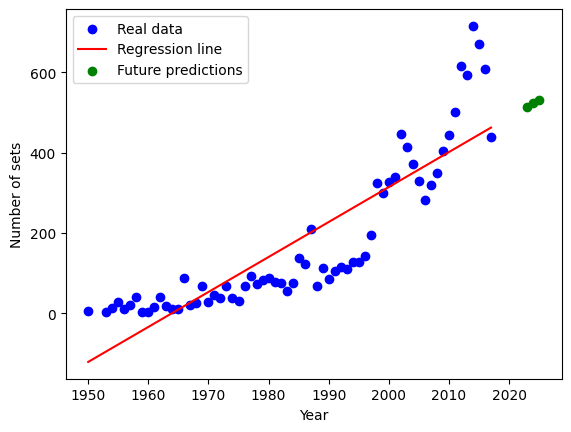

Prediction for 2023: 514.38 sets
Prediction for 2024: 523.08 sets
Prediction for 2025: 531.78 sets


In [19]:
# Group by year and count the number of sets released each year
sets_per_year = lego_merge.groupby('year').size().reset_index(name='num_sets')

# Prepare data for linear regression
X = sets_per_year['year'].values.reshape(-1, 1)
y = sets_per_year['num_sets'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the number of sets for the next few years
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
predictions = model.predict(future_years)

# Visualize the result
plt.scatter(sets_per_year['year'], sets_per_year['num_sets'], color='blue', label='Real data')
plt.plot(sets_per_year['year'], model.predict(X), color='red', label='Regression line')
plt.scatter(future_years, predictions, color='green', label='Future predictions')
plt.xlabel('Year')
plt.ylabel('Number of sets')
plt.legend()
plt.show()

# Print predictions
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Prediction for {year}: {prediction:.2f} sets")

## Connection to API

In [21]:

def fetch_part_images(part_name, api_url, api_key):
    # Send an HTTP request to the API to find the specific part
    headers = {
        'Authorization': f'key {api_key}'
    }
    params = {
        'search': part_name
    }
    response = requests.get(api_url, headers=headers, params=params)
    response.raise_for_status()  # Make sure the request was successful

    # Parse JSON response
    data = response.json()
    if not data or 'results' not in data or len(data['results']) == 0:
        print(f"Part not found: {part_name}")
        return

    # Create a set to store unique images
    unique_images = set()
    images = []
    titles = []

    for part in data['results']:
        img_url = part.get('part_img_url')
        part_name = part.get('name', 'Unknown')
        if not img_url:
            print(f"No image found for the part: {part_name}")
            continue
        
        # Download the image and check if it is already in the set
        img_response = requests.get(img_url)
        img_bytes = img_response.content

        if img_bytes not in unique_images:
            unique_images.add(img_bytes)
            img = Image.open(BytesIO(img_bytes))
            images.append(img)
            titles.append(part_name)
    
    # Create a horizontal scroll widget
    def show_image(index):
        clear_output(wait=True)  # Clear previous output
        plt.close('all')  # Close all open figures
        
        img = images[index]
        title = titles[index]

        # Show image using plt
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()

    if images:
        image_slider = widgets.IntSlider(value=0, min=0, max=len(images)-1, step=1, description='Image:')
        interactive_plot = widgets.interactive(show_image, index=image_slider)
        display(interactive_plot)
    else:
        print(f"No image found for the part: {part_name}")


    
# Usage example: Search and display images of a specific part
part_name = "batman"
api_url = "https://rebrickable.com/api/v3/lego/parts/"
api_key = 'your API key'
fetch_part_images(part_name, api_url, api_key)

No se encontró imagen para la parte: Slope Curved 4 x 5 x 1 2/3 with Batman Face print


interactive(children=(IntSlider(value=0, description='Image:', max=96), Output()), _dom_classes=('widget-inter…

Información de la pieza:
{'part_num': '3001', 'name': 'Brick 2 x 4', 'part_cat_id': 11, 'year_from': 1979, 'year_to': 2024, 'part_url': 'https://rebrickable.com/parts/3001/brick-2-x-4/', 'part_img_url': 'https://cdn.rebrickable.com/media/parts/elements/300121.jpg', 'prints': ['3001pr0043', '3001pr0009', '3001pr0016', '3001pr0002', '3001pr0011', '3001pr1015', '3001pr9993', '3001pr0006', '3001pr0010', '3001pr9990', '3001pr0033', '3001pr9999', '3001pr0038', '3001pr0013', '3001pr0041', '3001pr0024', '3001pr0028', '3001pr0021', '3001pr0029', '3001pr0119', '3001pr0031', '3001pr0030', '3001pr0040', '3001pr0004', '3001pr0019', '3001pr0037', '3001pr0012', '3001pr0036', '3001pr0027', '3001pr0020', '3001pr0014', '3001pr0015', '3001pr0008', '3001pr0017', '3001pr0042', '3001pr0032', '3001pr0026', '3001pr0025', '3001pr0034', '3001pr0022', '3001pr0044', '3001pr9998', '3001pr9997', '3001pr9994', '3001pr9996', '3001pr9995', '3001pr9991', '3001pr1018', '3001pr1005', '3001pr1020', '3001pr0003', '3001pr10

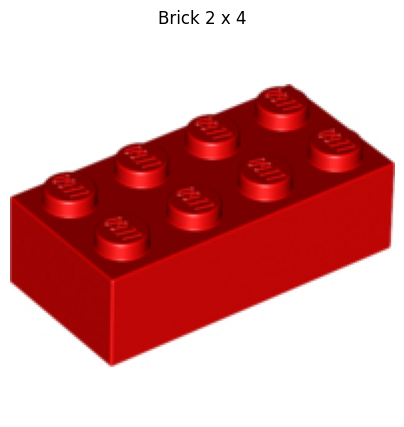

In [22]:


def get_part_info(part_num):
    url = f'https://rebrickable.com/api/v3/lego/parts/{part_num}/'
    headers = {
        'Authorization': f'key {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f'Error: {response.status_code}')
        return None

def show_part_info(part_info):
    if part_info:
        print("Part information:")
        print(part_info)
        
        img_url = part_info.get('part_img_url')
        if img_url:
            img_response = requests.get(img_url)
            img = Image.open(BytesIO(img_response.content))
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.title(part_info.get('name', 'Unknown'))
            plt.axis('off')
            plt.show()
        else:
            print("The image of the part was not found.")
    else:
        print("Part information not found.")

part_num = '3001'
part_info = get_part_info(part_num)
show_part_info(part_info)